In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv('index2018.csv')
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [3]:
df.shape

(6269, 5)

In [4]:
df.isnull().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [5]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [7]:
#Converting date to datetime
df.date = pd.to_datetime(df.date, dayfirst=True)

In [8]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [9]:
#Setting date feature as index
df.set_index('date', inplace=True)

In [10]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [11]:
#setting frequency
df = df.asfreq('b')

In [12]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [13]:
df.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [14]:
#filling missing values by imputation(forward fill)
df.spx = df.spx.fillna(method = 'ffill')

In [15]:
df.dax = df.dax.fillna(method = 'ffill')

In [16]:
#filling missing values by imputation(backward fill)
df.ftse = df.ftse.fillna(method = 'bfill')

In [17]:
df.nikkei = df.nikkei.fillna(method = 'bfill')

In [18]:
df.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

<AxesSubplot:xlabel='date'>

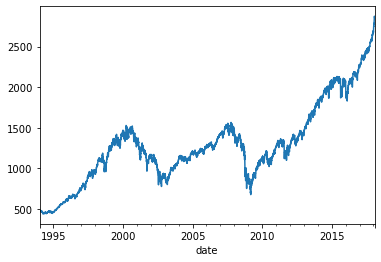

In [19]:
#Visualizing the plots for the various features
df.spx.plot()

<AxesSubplot:xlabel='date'>

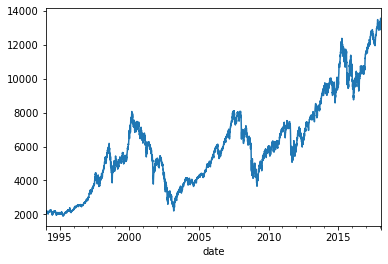

In [20]:
df.dax.plot()

In [21]:
#For this analysis, we would only work with the spx feature, so other features will be deleted from our dataframe
del df['dax'] ,df['ftse'], df['nikkei']

In [22]:
df.head()

,spx
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [23]:
#Generating white noise(stationary dataset) which has the same mean and standard deviation with the spx feature
wn = np.random.normal(loc= df['spx'].mean(), scale = df['spx'].std(), size = len(df))

In [24]:
df['wn'] = wn

In [25]:
df.head()

,spx,wn
date,,
1994-01-07,469.90,1354.648869
1994-01-10,475.27,836.319860
1994-01-11,474.13,784.459266
1994-01-12,474.17,1037.930876
1994-01-13,472.47,1786.215307


<AxesSubplot:xlabel='date'>

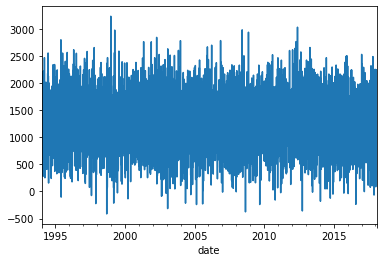

In [26]:
#Visualizing the white noise feature newly generated
df.wn.plot()

In [27]:
#from the plot above we can see that the white noise has a constant mean

In [28]:
#Inorder to test for the stationarity of feature, the dickey-fuller test will be used
#the null hypothesis assumes that a feature is stationary while the alternate hypothesis assumes non stationarity
#When we reject the null hypothesis, then we are accepting the alternate hypothesis
# A P-value less than 0.05 assumes stationarity hence accepting the null hypothesis while P value greater than 0.05 rejects the null hypothesis
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [29]:
sts.adfuller(df.spx)

(1.119498638172839,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.209867750025)

In [30]:
sts.adfuller(df.wn)

(-54.071406173972065,
 0.0,
 1,
 6275,
 {'1%': -3.431392546147741,
  '5%': -2.8620007132681926,
  '10%': -2.567015234685164},
 94929.92599472882)

In [31]:
#Testing for seasonality of the spx feature
sea_dec_add = seasonal_decompose(df.spx, model = 'additive')

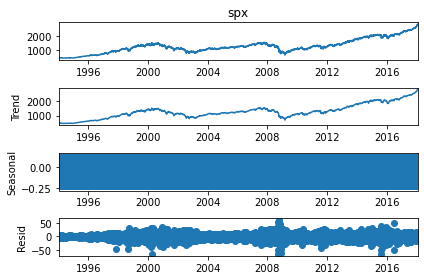

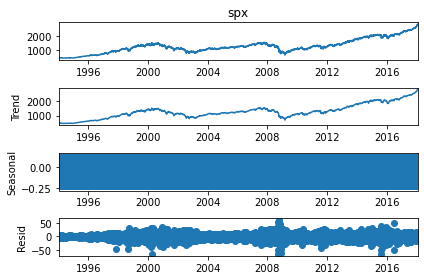

In [32]:
sea_dec_add.plot()

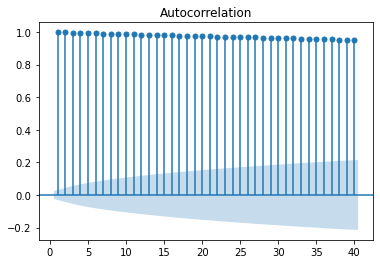

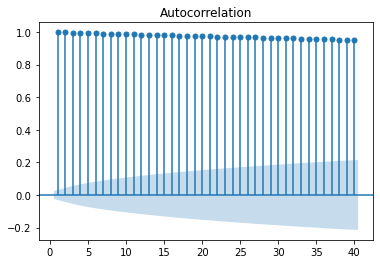

In [33]:
#Using the acf to determine significance and correlation
sgt.plot_acf(df.spx, lags = 40, zero= False)

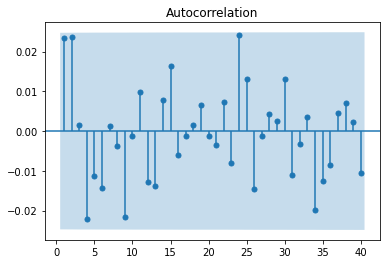

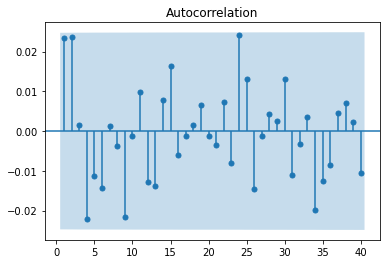

In [34]:
sgt.plot_acf(df.wn,lags = 40, zero = False )

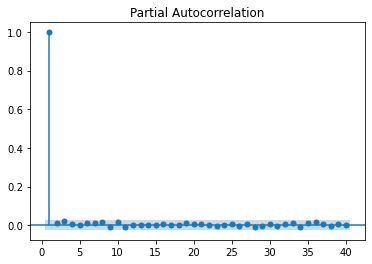

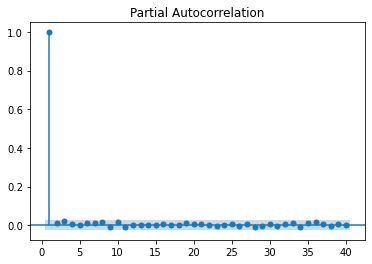

In [35]:
sgt.plot_pacf(df.spx, lags= 40, zero=False)

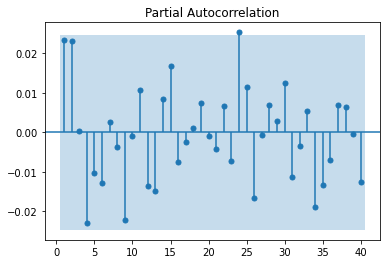

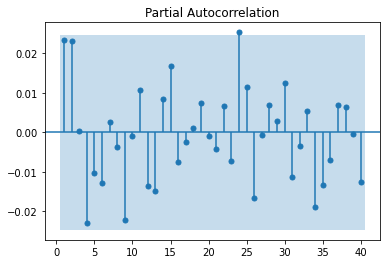

In [36]:
sgt.plot_pacf(df.wn, lags = 40, zero = False)

In [37]:
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

In [38]:
size = int(len(df)*0.8)
df_train = df.iloc[:size]
df_test = df.iloc[size:]

In [39]:
df_train.tail()

,spx,wn
date,,
2013-04-01,1562.173837,2200.392391
2013-04-02,1570.252238,999.587481
2013-04-03,1553.686978,1276.714879
2013-04-04,1559.979316,1351.817586
2013-04-05,1553.278930,836.028216


In [40]:
df_test.head()

,spx,wn
date,,
2013-04-08,1563.071269,1599.700041
2013-04-09,1568.607909,475.398885
2013-04-10,1587.731827,681.686083
2013-04-11,1593.369863,788.318970
2013-04-12,1588.854623,1448.034193


In [41]:
#Modelling using AutoRegressive model
model_ar = ARMA(df_train.spx, order=(1,0))
results_ar = model_ar.fit()
results_ar.summary()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version.

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    spx   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -20097.388
Method:                       css-mle   S.D. of innovations             13.238
Date:                Mon, 03 Oct 2022   AIC                          40200.776
Time:                        22:20:45   BIC                          40220.340
Sample:                    01-07-1994   HQIC                         40207.631
                         - 04-05-2013                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1061.7864    228.162      4.654      0.000     614.598    1508.975
ar.L1.spx      0.9994      0.001   1911.964      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
-----------------------------------------------------------------------------
"""

In [43]:
start_date = '2013-04-08'
end_date = '2014-04-07'

In [44]:
df_pred = results_ar.predict(start= start_date, end= end_date)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='date'>

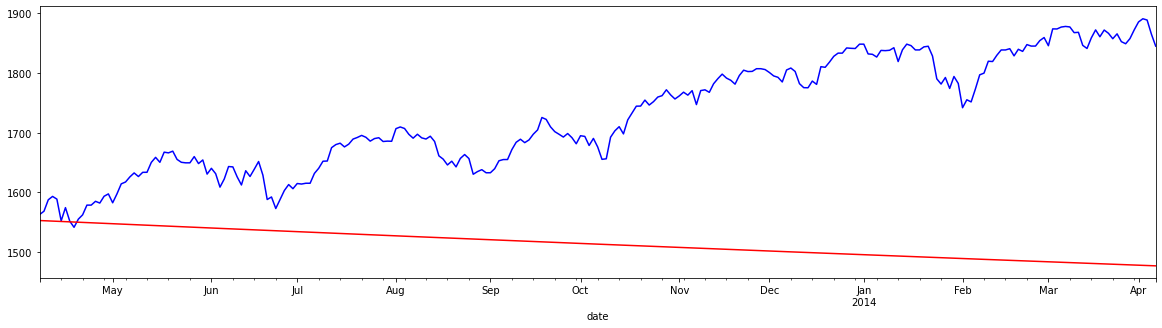

In [45]:
df_test.spx[start_date:end_date].plot(figsize=(20,5), color='blue')
df_pred[start_date:end_date].plot(figsize=(20,5), color='red')

In [42]:
#Modelling using Moving Averages
model_ma = ARMA(df_train.spx, order=(0,1))
results_ma = model_ma.fit()
results_ma.summary()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version.

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    spx   No. Observations:                 5021
Model:                     ARMA(0, 1)   Log Likelihood              -32325.385
Method:                       css-mle   S.D. of innovations            151.233
Date:                Mon, 03 Oct 2022   AIC                          64656.771
Time:                        22:21:02   BIC                          64676.335
Sample:                    01-07-1994   HQIC                         64663.626
                         - 04-05-2013                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6342      4.203    259.715      0.000    1083.396    1099.872
ma.L1.spx      0.9696      0.003    363.351      0.000       0.964       0.975
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0314           +0.0000j            1.0314            0.5000
-----------------------------------------------------------------------------
"""

In [46]:
start_date = '2013-04-08'
end_date = '2014-04-07'

In [47]:
df_pred_2 = results_ma.predict(start= start_date, end= end_date)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='date'>

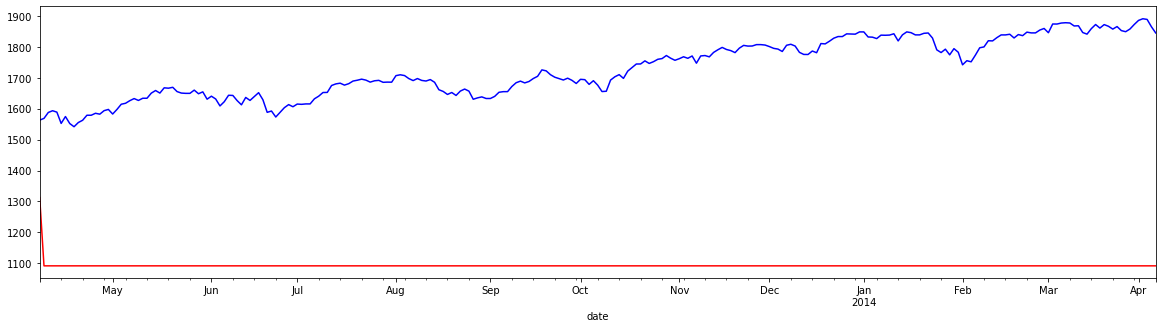

In [48]:
df_test.spx[start_date:end_date].plot(figsize=(20,5), color='blue')
df_pred_2[start_date:end_date].plot(figsize=(20,5), color='red')